# Kevin Martin CIS700 - Monday @ 8:00pm EST

Assignment 2

# Question 1
Given the relations shown on the below plot, the **Mutual Information** measure would be able to pick up and explain the relation the best. This is because, as seen by the graph, the relationship between x and y is non-linear. Pearson Correlation assumes and requires that the independent and dependent variables be linearly related. From a Mutual Information perspective, we can surmize that variables x and y are (statistically) highly dependent on each other

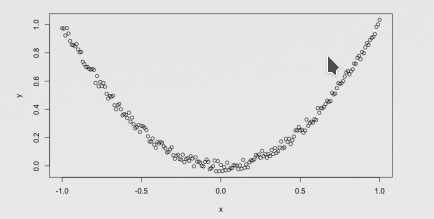

From Assignemnt 1, I used a binary "IsBitcoin" flag to help classify, based on the available features, if a transaction was or was not in Bitcoin. From that data set, a correlation chart between two variables is shown below: the chosen feature being volume (as shown, the highest correleated attribute), and target class being IsBitcoin. I am using some of the common built-in Python libraries to help organize and present my data.

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
#path = '/home/kebin/Syracuse/Syracuse/CIS700/Assignment1/crypto_short.csv'
path = '/home/kebin/Syracuse/Syracuse/CIS700/Assignment1/crypto.csv'
df =  pd.read_csv(path, sep=',')
# from assignment 1, dropping all the "blank" records which are records that have no currency specified
df = df.dropna(how='any', subset=['crypto_name'])
# add the IsBit flag
df['IsBit'] = np.where(df['ticker']=='BTC',1,0)
#df['IsBit'] =df['IsBit'].astype('category').cat.codes
df[df.columns[1:]].corr()['IsBit'][:]

volume                         0.378576
price_usd                      0.029231
price_btc                      0.029261
market_cap                     0.742206
capitalization_change_1_day   -0.000050
USD_price_change_1_day        -0.000322
BTC_price_change_1_day        -0.000321
crypto_type                   -0.032248
max_supply                    -0.005187
minable                        0.045888
IsBit                          1.000000
Name: IsBit, dtype: float64

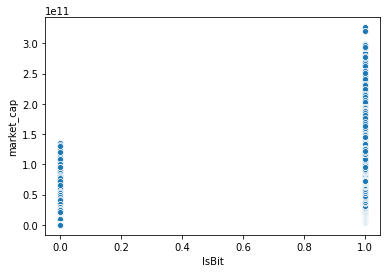

In [52]:
sns.scatterplot(x="IsBit", y="market_cap",data=df)

Given that the target attribute in this case is binary, the distribution is a little different. However in this case we can still see that, in general, higher market cap is more likely to indicate that a transaction was in Bitcoin. This makes sense as, while some larger currencies (like Ethereum ) also trade in larger amounts, Bitcoin is still the most likely candidate for an above average transaction size.

# Question 2

The difference between feature selection and feature reduction is that feature selection reduces the number of featurs by choosing a subset of those already available, while feature reduction reduces the number of dimensions available, often by building a new set of features fomr the orginal set. Feature selection can be used to filter irrelevant or reduant feature from the dataset. By looking at the features themselves, both in terms of format and as well as content, removing unnecessary ones can be relatively easy. Furthermore, features that are redundant and provide similar correlations can certainly be removed.

By contrast, feature reduction creates a new, smaller set of features that still allows us to extract similar meaning from the data. This is more of an unsupervised approach where the new features are unknown at the beginning. The statsitcial relationships between the original features drive the feature reduction process.

An example of each from my dataset is shown below.

First, an example of feature selection using a wrapper feature selection, recursive feature elimination (RFE). This mehtod works by first removing the attributes that contribute the least to the accuracy of predicting the target attribute, then building a model on the features that remain. The accuracy will be judged by implementing a logistic regression classifier, with the target class being the "IsBit" flag. For simplicity, I will remove all non-numeric columns, and also drop the NaN recrods from the remaining data set.

In [22]:
#prep data: remove string columns and NaN values
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
df2 = df.drop(['trade_date', 'crypto_type' 'crypto_name', 'ticker', 'site_url', 'github_url', 'platform_name', 'industry_name'], axis = 1)
df2.dropna(inplace=True)
print(df2.dtypes)

volume                         float64
price_usd                      float64
price_btc                      float64
market_cap                     float64
capitalization_change_1_day    float64
USD_price_change_1_day         float64
BTC_price_change_1_day         float64
crypto_type                    float64
max_supply                     float64
minable                        float64
IsBit                            int64
dtype: object


In [21]:
array = df2.values
X = array[:,0:10]
Y = array[:,10]
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 3
Selected Features: [ True False False  True False False False False  True False]
Feature Ranking: [1 4 8 1 6 3 2 7 1 5]


Based on the results of the RFE approach using logistic regression, the three attributes flagged with a "1" in the Feature Ranking array are the top three attributes which contribute the most to prediction. Those attributes are volume, market_cap, and max_supply. Thus the data set moves from 10 features to the three most useful ones.

In [25]:
df2[['volume', 'market_cap', 'max_supply']].describe()

,volume,market_cap,max_supply
count,4.106530e+05,4.106530e+05,4.106530e+05
mean,4.793151e+07,4.673548e+08,5.122304e+10
std,8.629048e+08,6.962074e+09,6.084117e+11
min,0.000000e+00,0.000000e+00,1.250000e+03
25%,2.510000e+02,7.941500e+04,3.180000e+07
50%,8.079000e+03,8.609400e+05,1.563067e+08
75%,1.972470e+05,8.299564e+06,1.083202e+09
max,7.415677e+10,3.265025e+11,1.000000e+13


Next, I will implement feature reduction to the dataset by implementing a common dimensionality reduction method, principal component analysis (PCA). Here we will reduce the original features into new dimensions. Originally, we start with 10 distinct columns which represent attributes. After, we will have only four (an arbitrary number used for display purposes) dimensions. These new dimensions won't have any definitive meaning, but will help to consolidate our available features before applying any further models.

In [33]:
# Using the same X and Y from the first example
# First standardize the data
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
# Apply PCA, showing the four resulting dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
components = pca.fit_transform(X)
df_pca = pd.DataFrame(data = components, columns = ['PCA 1', 'PCA 2', 'PCA 3', 'PCA 4'])
df3 = pd.concat([df_pca, df2[['IsBit']]], axis=1)
df3.describe()

,PCA 1,PCA 2,PCA 3,PCA 4,IsBit
count,4.106530e+05,4.106530e+05,4.106530e+05,4.106530e+05,410653.000000
mean,-4.740954e-17,6.540441e-18,4.983193e-17,-2.295859e-18,0.003784
std,1.741267e+00,1.414009e+00,1.287406e+00,1.000002e+00,0.061400
min,-3.787778e-01,-1.107010e-01,-2.610990e+00,-7.130210e-01,0.000000
25%,-1.642939e-01,-3.199027e-02,-9.572321e-01,-3.418242e-04,0.000000
50%,-1.261708e-01,1.342915e-02,-9.551890e-01,9.668296e-04,0.000000
75%,-1.258515e-01,1.344135e-02,4.738436e-01,2.055156e-03,0.000000
max,6.116527e+01,1.770056e+02,5.625258e+00,5.509543e+02,1.000000


# Question 3

When analyzing datasets, it is important to have enough data and enough features to test and derive relationships. In general, more data is better than less, assuming that the data is clean and accurate. However, with high-dimensional datasets (those with lots of features), problems begin to arise. Too many attributes to examine can become its own hurdle to overcome. Of the problems listed in the referenced survey, I will discuss four.

## 3.1 Concentration of Scores and Distances

Consider how many classification techniques rely on the distance between data points, and the relationships between those distances. Being able to group and label different clusters is incredibly important, and the relative distances are the main driver. In datasets with low dimensionality, the absolute distances between points is generally quite high. But as dimensionality grows, those distances tend to shrink. The situation arises where the nearest neighbor begins to approach the same distance of the farthest neighbor.

In the most extreme example, an infinitely-dimensional dataset, the distance between each data point is zero, and thus classification through these methods becomes impossible. However a more real-world example is that of networking. In a very complex network with a high degree of dimensionality, we would expect to naturally observe another phenomenon (hubness) whereby a few nodes show up in an abnormal amount of observations. The resulting hubness also creates a scenario of concentraion of scores/distances that could potentially skew or even invalidate classification algorithms.

## 3.2 Exponential Search Space

This is a similar problem to that of the concentrations of scores and distances, in that as the dimensionality of the dataset grows, we have an inverse effect on the usefulness of the approach. The number of potential subspaces grow exponentially with the number of dimensions, so scanning through them trends towards impossible.

The issue of exponential search space is most present in clustering problems. For example, consider web text mining using document clustering. On the internet there are billions of source documents available, and within each document there are a collection of phrases, and within each phrase are a collection of words. This makes for a high-dimensional problem that would, if the scope were large enough, fall victim to the computational challenges of these exponential subspaces.

## 3.3 Data Snooping Bias

Data snooping bias is the potential result of exhaustively searching through different combinations of features and "finding" a result that doesn't actually persist. This is something that hpapens by chance, and with a higher degree of dimensionality and more reccords to examine, the possibility of this happening grow. 

An example of this bias could come from extensive backtesting, such as in the context of financial data. Because the data of capital markets is so well documented and easy to obtain, it is very easy to examine potentially far greater data then needed. Presumably, one could derive rules for trading that only exist in the historical examination (when combined with chance) and that do not actually exist in the real world. Thus applying those rules to live data would yield poor results.

## 3.4 Hubness

In the context of neighbor lists, the phenomenon where certain objects occur more frequently than others has been identified as "hubness". With increasing dimensionality, many points can show a small or intermediate centralist property, while some points show a high degree. This makes it harder to detect outliers. In a normal distribution of data, hubs should be rare and unusual. Furthermore, high dimensionality does necessarily indicate the presence of hubness, but rather the the data itself and how dense or sparse it is will determine if the phenomenon exists.

An example would be a dataset that is grounded in a networking situation, such as internet traffic. Measuring internet traffic could be subject to high dimensionality with features ranging from time of day, location of request, location of fulfilment, page before visit, page after, ect. However internet traffic is routed through servers and the measurement of which servers and where they are located could most certainly exhibit hubness. Trying to get an accurate classification may be impacted by the concentration and frequency of specific servers.

# Question 4

From my dataset, I will show a correlation-based feature selection for the top 6 features using the standard Python tools pandas and scikit-learn. 

In order to show this, I will first prepare the data. First, similar to question 1, I will remove the non-statistical features. In my particular dataset there are items like the currency's site URL and github URL, which are completely irrelevant to any sort of data analysis. Then there are a couple of columns, such as cyrpto_name and ticker, which are not only redundant but rendered irrelvant with my "IsBit" feature. Additionally, there is a "crypto_type" flag column which doesn't really provide any information on what it's for. Most currencies (including Bitcoin) are flagged as 0 and only a couple have a 1, so I'm removing it as well.

By trying to classify whether or not a transaction was in the currency of Bitcoin, we can see what features help identify Bitcoin as opposed to another currency. Bitcoin is unique in the dataset as it is by far the most well known and heavily traded currency. As such, I would expect there to be a couple relatively highly correlated fields which is helpful for display purposes.

The other thing I would like to be aware of is to make sure I don't overlook negatively correlated features. Those are of course just as important positively correlated features, and are just as helpful in classification for the target feature. As such, I will take the absolute value of the correlations and sort the results. This will allow us to quickly 

In [49]:
#Get the absolute value of correlations for each feature to the target attribute and print the top 6
df = df.drop(['crypto_type'], axis = 1)
df_corr = df[df.columns[1:]].corr()['IsBit'][:].abs().sort_values(kind="quicksort", ascending=False)
print(df_corr[0:6])

IsBit         1.000000
market_cap    0.742206
volume        0.378576
minable       0.045888
ticker        0.038218
price_btc     0.029261
Name: IsBit, dtype: float64


The first attribute is quite obvious and of course has a perfect correlation, that of the attribute against itself. The next three attributes are all quite helpful in our classification problem. As mentioned, Bitcoin trades much more frequently than other cyrptocurrencies, so the market_cap and volume make immediate sense. More trades in a given day probably indicate a more popular coin. The next field is also interesting: minable. This is a binary (yes/no) flag of whether or not the currency can be "mined" or created by anyone as opposed to some centralized agency. Not all coins are equal, and this is a rather hotly debated topic in the community. The last two features are actually a bit of a surprise in terms of how they're correlated. Ticker and price_btc are interesting because I would have assumed they would have been much more highly correlated. However I suspect the vast amount of currencies and the extremly volatile nature of this industry contribute to the nosie obscuring their inherent connection to the target attribute.

# Question 5

Given the following dataset I will compute entropy of Origin, mutual information between Origin and Classification, and Entropy and Conditional Entropy:

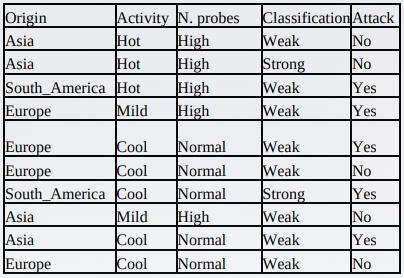

## Question 5a

To compute entropy of Origin, I will use the entropy forumula which is simply the sum of the differences of probabilities for each option:

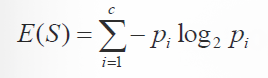

There are a total of 10 records, and three possible choices for Origin. Thus:

**Entropy(Origin)** = Entropy (4,2,4)<br>
                    = Entropy(.40,.20,40)<br>
                    = -(.4$log_{2}$0.4)-(.2$log_{2}$0.2)-(.4$log_{2}$0.4)<br>
                    **= 1.52**

## Question 5b
To compute the mutual information between Origin and Classification, I will subtract the entropy of Origin given Classification from the entropy of Origin (previously calculated).

The entropy of Origin given Classification is defined by the following table:

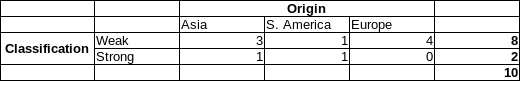

=(8/10) * E(3,1,4) + (2/10) * E(1,1,0)<br>
=(8/10) * 1.594 + (2/10) * 0<br>
=1.276<br>
Now multiply by the entropy of Origin, calculated above:<br>
=1.276 * 1.52<br>
**=1.939**

## Question 5c
If we are trying to predict the Attack variable, Conditional Entropy would be most useful. We already know the information regarding one of the variables (Attack), thus we are not looking at a random pairing. The outcome of computing conditional entropy will tell us more given our specific target.

# Question 6

In order to reduce dimensions and keep at least 90% of the variance in the data, I would calculate the proportion of variance explained for each feature. Then, I would add the features with the largest explained proportion of of variance until that proportion achieved the target 90%.

In order to do that, I would first create a covariance matrix for the available features. The covariance between features will allow us to see which features will add the most explanatory information. Because we're using PCA, next find the Eignevalues for each principal component. Sort those from largest to smallest, and sum them up iteratively until we have achieved 90%.

To demonstrate, I will use a sample dataset. My dataset doesn't have that many features so it will be easier to show on something with more attributes. An example pre-loaded into the scikit-learn dataset, digits, which has ~1,700 records and 64 features to choose from. From this dataset, we will find that **in order to retain 90% of the variance in the data, we will need to reduce the data down to a dimension of 30.** That's almost half of the available features. Finally, I'll show a quick graph to visualize how the addition of features contributes to the overall variance explanation.

In [66]:
# import the data and show the number of records and features
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [67]:
# convert the data to pandas data frame, drop non-numeric values, and scale
df_digits = pd.DataFrame(digits.data)
df_digits.replace([np.inf, -np.inf], np.nan)
df_digits = df_digits.dropna(axis = 1, how = 'any') 
df_digits = df_digits._get_numeric_data() 
x = df_digits.values
x = scale(x);x

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [75]:
# Create a covariance matrix and calculate Eignevalues
# The resulting array will show the amount of variance explained by each principal component
covar = PCA(n_components = 64)
covar.fit(x)
var = covar.explained_variance_ratio_
var=np.cumsum(np.round(covar.explained_variance_ratio_, decimals=5)*100)
print(var)

[12.034 21.595 30.039 36.537 41.397 45.611 49.553 52.942 55.94  58.872
 61.654 64.231 66.506 68.733 70.898 72.812 74.588 76.226 77.822 79.311
 80.659 81.931 83.097 84.155 85.13  86.075 86.938 87.775 88.573 89.319
 90.045 90.737 91.391 92.032 92.623 93.194 93.718 94.2   94.654 95.077
 95.483 95.88  96.236 96.577 96.905 97.216 97.505 97.781 98.04  98.274
 98.492 98.696 98.892 99.075 99.243 99.404 99.552 99.687 99.812 99.916
 99.999 99.999 99.999 99.999]


In [79]:
# We can see that there is certainly a threshold to get to 90%
# Display the minimum number of features
result = np.where(var>=90)
print(result[0][0])

30


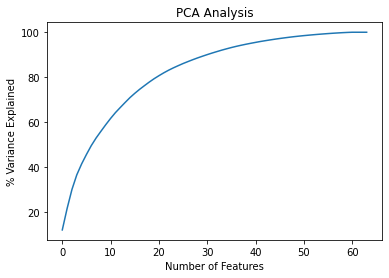

In [84]:
# Finally, as a last check, we can see visually that 30 does indeed correspond to ~90% of variance explained
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.plot(var)